In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
df = pd.read_csv("adult_updated.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,age,fnlwgt,education,educational-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,working,occupation
0,25,226802,11th,7,Never-married,Own-child,Black,Male,0,0,40,United-States,<=50K,Private,Machine-op-inspct
1,38,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,50,United-States,<=50K,Private,Farming-fishing
2,28,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,0,40,United-States,>50K,Local-gov,Protective-serv
3,44,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,0,40,United-States,>50K,Private,Machine-op-inspct
4,18,103497,Some-college,10,Never-married,Own-child,White,Female,0,0,30,United-States,<=50K,False,False


In [3]:
df.skew()

C:\Users\DELL\AppData\Local\Temp/ipykernel_18500/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age                 0.557580
fnlwgt              1.438892
educational-num    -0.316525
capital            11.894659
capital.1           4.569809
hours               0.238750
dtype: float64

In [4]:
cols =['age','fnlwgt','educational-num','capital','capital.1','hours']

In [5]:
for col in cols:
    print(col,df[col].skew())

age 0.5575803166133181
fnlwgt 1.4388918785218416
educational-num -0.3165248566607419
capital 11.894658996587946
capital.1 4.569808857738484
hours 0.23874965720275756


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

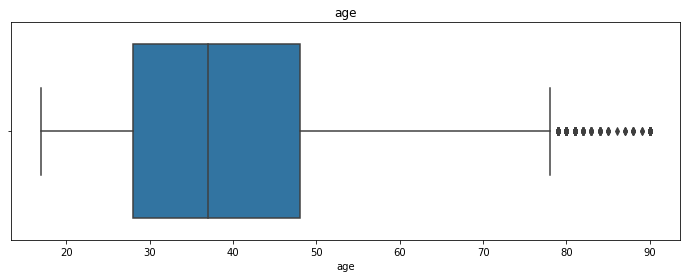

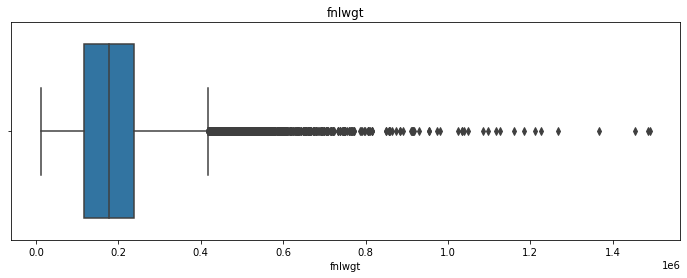

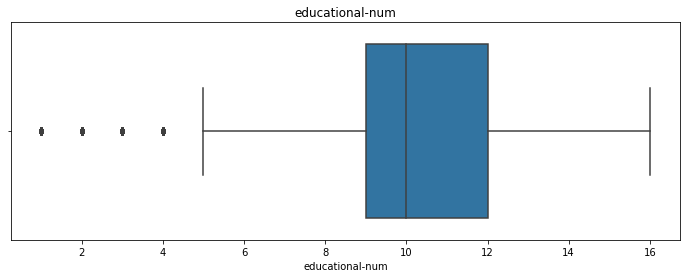

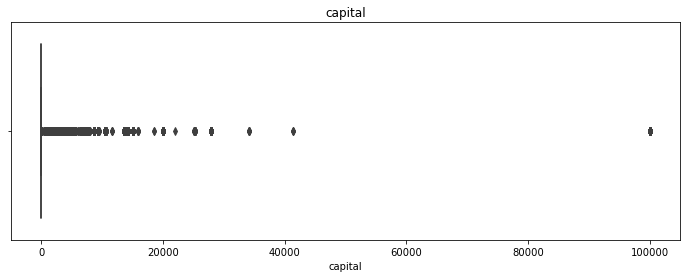

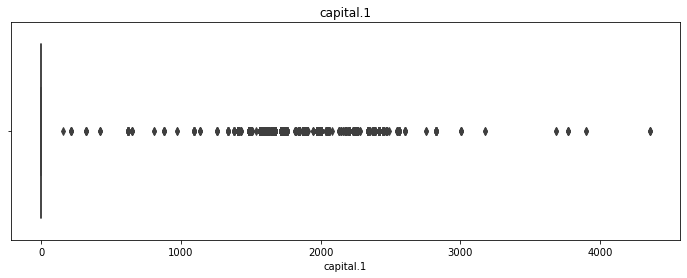

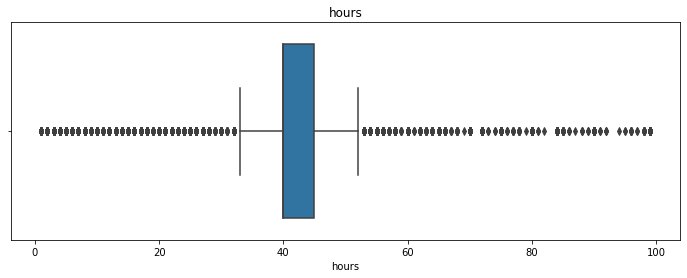

In [6]:
for col in cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)
                

In [7]:
df1 = df.copy()

In [8]:
def detect_outliers_IQR(col):
    #finding the IQR
    percentile25 = df1[col].quantile(.25)
    percentile75 = df1[col].quantile(.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper_limit",upper_limit)
    print("Lower_limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit, lower_limit, df1[col]))
    return df1[df1[col] > upper_limit]
    #return df1[df1[col] < lower_limit]

In [9]:
detect_outliers_IQR('age')

percentile25 28.0
percentile75 48.0
Upper_limit 78.0
Lower_limit -2.0


,age,fnlwgt,education,educational-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,working,occupation


In [10]:
detect_outliers_IQR('fnlwgt')

percentile25 117550.5
percentile75 237642.0
Upper_limit 417779.25
Lower_limit -62586.75


,age,fnlwgt,education,educational-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,working,occupation


In [11]:
detect_outliers_IQR('educational-num')

percentile25 9.0
percentile75 12.0
Upper_limit 16.5
Lower_limit 4.5


,age,fnlwgt,education,educational-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,working,occupation


In [12]:
detect_outliers_IQR('capital')

percentile25 0.0
percentile75 0.0
Upper_limit 0.0
Lower_limit 0.0


,age,fnlwgt,education,educational-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,working,occupation


In [13]:
detect_outliers_IQR('capital.1')

percentile25 0.0
percentile75 0.0
Upper_limit 0.0
Lower_limit 0.0


,age,fnlwgt,education,educational-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,working,occupation


In [14]:
detect_outliers_IQR('hours')

percentile25 40.0
percentile75 45.0
Upper_limit 52.5
Lower_limit 32.5


,age,fnlwgt,education,educational-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,working,occupation


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

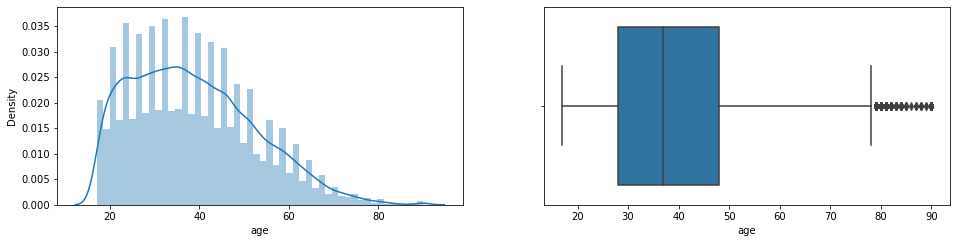

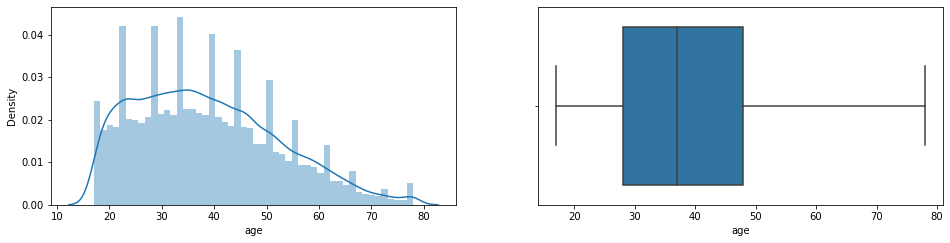

In [15]:
# comapring

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['age'])

plt.subplot(2,2,2)
sns.boxplot(df['age'])

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['age'])

plt.subplot(2,2,2)
sns.boxplot(df1['age'])

plt.show()


In [16]:
#comparing skewness

In [17]:
df.skew()

C:\Users\DELL\AppData\Local\Temp/ipykernel_18500/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age                 0.557580
fnlwgt              1.438892
educational-num    -0.316525
capital            11.894659
capital.1           4.569809
hours               0.238750
dtype: float64

In [18]:
df1.skew()

C:\Users\DELL\AppData\Local\Temp/ipykernel_18500/149261804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


age                0.515820
fnlwgt             0.555106
educational-num   -0.035567
capital            0.000000
capital.1          0.000000
hours              0.439533
dtype: float64

In [22]:
#saving csv file
df1.to_csv("outlier_removed.csv")

,age,fnlwgt,education,educational-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,working,occupation
0,25,226802,11th,7,Never-married,Own-child,Black,Male,0,0,40,United-States,<=50K,Private,Machine-op-inspct
1,38,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,50,United-States,<=50K,Private,Farming-fishing
2,28,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,0,40,United-States,>50K,Local-gov,Protective-serv
3,44,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,0,40,United-States,>50K,Private,Machine-op-inspct
4,18,103497,Some-college,10,Never-married,Own-child,White,Female,0,0,30,United-States,<=50K,False,False
